In [1]:
# Import libraries. You may or may not use all of these.
#!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [13]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-05-22 08:41:32--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.1’

insurance.csv.1     100%[===================>]  49.09K  --.-KB/s    in 0.005s  

2024-05-22 08:41:32 (8.79 MB/s) - ‘insurance.csv.1’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [14]:
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
INT_COLUMNS = ['age', 'children']
NUMERIC_COLUMNS = ['bmi']

# Preprocessing data using pandas. The strings columns must be
# coded as integers. To do this I'm using pandas factorize
for feature_name in CATEGORICAL_COLUMNS:
    dataset[feature_name]=pd.factorize(dataset[feature_name])[0]

#for feature_name in INT_COLUMNS:
#    dataset[feature_name]=pd.factorize(dataset[feature_name])[0]

#We are going to use 80% of the data to train and 20% to eval
#the data is goint to be randomly selected from the dataset

#Randomly select 80% of dataset to train
train_dataset=dataset.sample(frac=0.8)
#Drop the remainen 20% to eval
test_dataset=dataset.drop(train_dataset.index)

#define features and labels

train_features = train_dataset.copy()
test_features = test_dataset.copy()
# Cut the information about their expenses
# and keep it in y_train and y_eval using .pop() from pandas
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


# Numerical columns
# Create the normalization layer.
# Calculate a mean and variance for each index on the last axis.
# Fit the state of the preprocessing layer to the data by calling Normalization.adapt:
# This layer has the mean an var of the train_features, when applied to a given input data
# the result is (input_data - mean(train_features))/var(train_features)

normalizer = layers.Normalization(axis=-1)
normalizer.adapt(train_dataset)

#Create the model

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(16),
    layers.Dense(8),
    layers.Dense(1)
    ])

#Compile the model

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])
model.build()
model.summary()
#Training the model

model.fit(train_dataset,
          train_labels,
          validation_split=0.5,
          epochs=50,
          verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 6)                 13        
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 16)                112       
                                                                 
 dense_10 (Dense)            (None, 8)                 136       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 270 (1.06 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________
Epoch 1/50
17/17 [==============================] - 1s 17ms/step - loss: 13733.7559 - ma

9/9 - 0s - loss: 0.0000e+00 - mae: 0.0000e+00 - mse: 0.0000e+00 - 160ms/epoch - 18ms/step
Testing set Mean Abs Error:  0.00 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


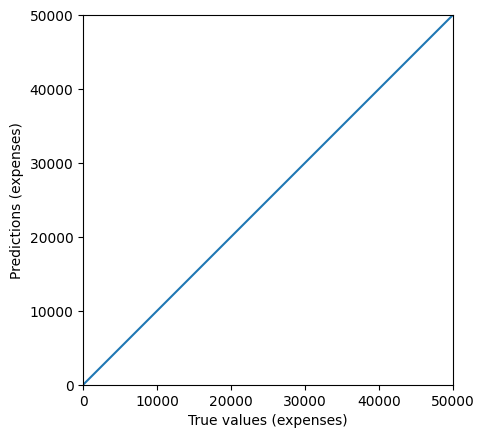

In [16]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_labels).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
